# Electricity and Magnetism Problems

## Electric field of coaxial cable
Consider a long coaxial cable that has the cross-section illustrated in the figure. The cable has an inner core of radius a, which carries a surface charge density σ, and a thin outer cylindrical shell of radius b. The outer shell has a charge density such that the charge on the shell is equal to and apposite that of the inner core. Plot the magnitude of the electric field and the electric potential as a function of the radial distance s.


Text(0, 0.5, '$z$')

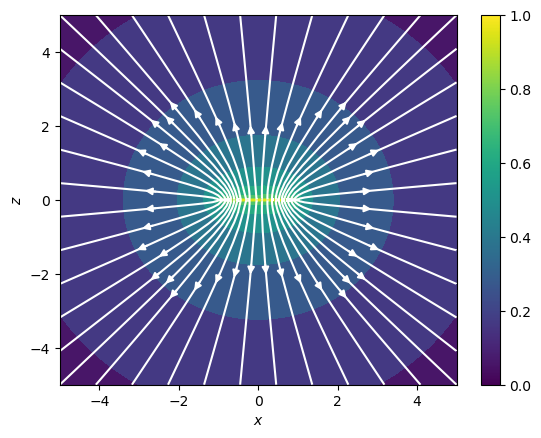

In [3]:
import numpy as np
from scipy import constants
import matplotlib.pyplot as plt 


class Charge( object ): 
    def __init__(self, r):
        self.r = r
        self.q = constants.elementary_charge

    def field(self, x, z):
        d  = np.sqrt((x-self.r[0])**2 + (z-self.r[2])**2 )
        ex = self.q*(x-self.r[0])/(d**3)/(4*constants.pi*constants.epsilon_0)
        ez = self.q*(z-self.r[2])/(d**3)/(4*constants.pi*constants.epsilon_0)
        return (ex, ez)

    def x(self): 
        return self.r[0]
    
    def z(self):
        return self.r[2] 

    def charge(self):
        return self.q

xx, zz = np.meshgrid( np.linspace(-5, 5, 500), np.linspace(-5, 5, 500)) 
 
N = 750
phi = np.random.uniform(0, 2*np.pi, N)
r = np.sqrt(np.random.uniform(0, 1, N)) #choose disk radius = 1
x = r*np.cos(phi)
y = r*np.sin(phi)
z = np.zeros(N)

charges = [Charge(np.array([x[i], y[i], z[i]])) for i in range(N)]

ex, ez = np.sum([c.field(xx, zz) for c in charges], axis=0)
em = np.hypot(ex, ez) 

plt.contourf( xx, zz, np.log10(em) )
plt.streamplot( xx, zz, ex/em, ez/em, density=0.4, broken_streamlines=False, color='w' ) 
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$z$')

## Trajectory of a proton in EM fields

A proton with an initial position $(1, 0, 0)$ and velocity $(0, 1, 0)$ (in metres and metres per second, respectively) is moving inside a constant electric and magnetic field. Using a computer, program plot the trajectory of the proton for cases where the fields are (a) perpendicular and (b) parallel to each other. Choose the directions an magnitudes of the fields to highlight interesting features of the particle motion. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from scipy import constants as cons

initial_vals = [1.0, 0.0, 0.0, 0.0, 1.0, 0.0] #x, y, z, vx, vy, vz
bfield_perp = np.array([0, 0, 1.0])  
charge = cons.elementary_charge 
mass   = cons.proton_mass   

def lorentz_force(values, t, B,  q, m, E):
    x, y, z, vx, vy, vz = values 
    x2 = q*((vy*B[2] - vz*B[1]) + E[0])/m 
    y2 = q*((vz*B[0] - vx*B[2]) + E[1])/m
    z2 = q*((vx*B[1] - vy*B[0]) + E[2])/m 
    
    return [vx, vy, vz, x2, y2, z2]

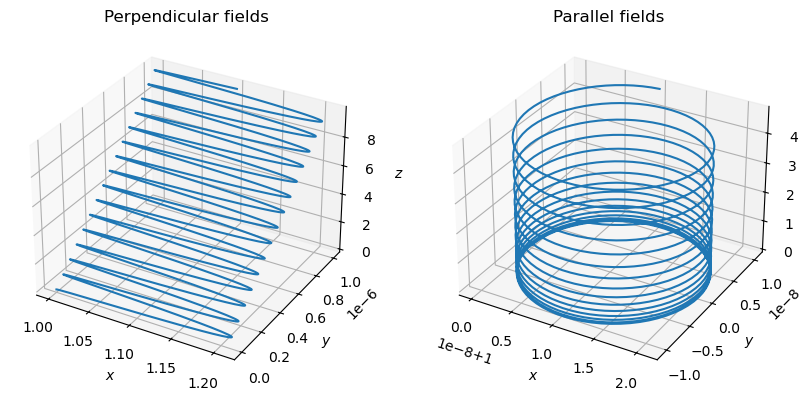

In [18]:
#E fields
E_perp = np.array([1e7, 0, 0]) 
E_para = np.array([0, 0, 1e5])

#B fields
B_perp = np.array([0, 1.0, 0]) 
B_para = np.array([0, 0, 1.0]) 

t = np.linspace(0, 1000, 1001)
s_perp = odeint(lorentz_force, initial_vals, 1e-9*t, args=(B_perp, charge, mass, E_perp))
s_para = odeint(lorentz_force, initial_vals, 1e-9*t, args=(B_para, charge, mass, E_para))

fig, axs = plt.subplots(1, 2, figsize=(10, 7), subplot_kw={'projection': '3d'})
axs[0].plot(s_perp[:,0], s_perp[:,1], s_perp[:,2])
axs[1].plot(s_para[:,0], s_para[:,1], s_para[:,2])

s_name = ["Perpendicular fields", "Parallel fields"]
for i in range(len(axs)):
    axs[i].set_xlabel(r'$x$')
    axs[i].set_ylabel(r'$y$')
    axs[i].set_zlabel(r'$z$')
    axs[i].set_title(s_name[i])

## Magnetic field around loop of wire

Consider a loop of wire carrying a current I that is centred at a position (0, 0, 0) with radius R
in the x–y plane. Plot the relative magnitude and direction of the magnetic field in the (x, z) plane when
y = 0 using a computer program, numerically integrating over the loop at each point in
the plane.

In [48]:
import matplotlib.pyplot as plt 
import numpy as np
from scipy import constants, integrate

r = 2
phi = np.linspace(0, 2*np.pi, 100)
x = r*np.cos(phi)
y = r*np.sin(phi)
z = abs(0 * x)
phi_min = 0
phi_max = 2*np.pi

In [50]:
def field_from_coil_element(phi, rpos, r, current):
    etavec  = rpos - np.array([r*np.cos(phi), r*np.sin(phi), 0]) 
    dl  = np.array([-r*np.sin(phi), r*np.cos(phi), 0])
    norm  = constants.mu_0*current/(4*np.pi)
    dist  = np.sqrt(np.dot(etavec, etavec))
    
    return norm*np.cross(dl, etavec)/(dist**3) #dB

def field_at_position(rpos, phi_min, phi_max, radius, current):
    xint = lambda phi: field_from_coil_element(phi, rpos, radius, current)[0] 
    yint = lambda phi: field_from_coil_element(phi, rpos, radius, current)[1] 
    zint = lambda phi: field_from_coil_element(phi, rpos, radius, current)[2] 
    
    return (integrate.quad(xint, phi_min, phi_max)[0], 0, integrate.quad(zint, phi_min, phi_max)[0])

In [52]:
xx, zz = np.meshgrid(np.linspace(-4, 4, 20), np.linspace(-4, 4, 20))
yy = abs(xx.ravel()*0)
         
positions = np.vstack([xx.ravel(), yy, zz.ravel()]).T

bx, by, bz = [], [], []
for pos in positions: 
    field = field_at_position(pos, phi_min, phi_max, r, current=1)
    bx.append(field[0])
    by.append(field[1])
    bz.append(field[2])

(-3.5, 3.0)

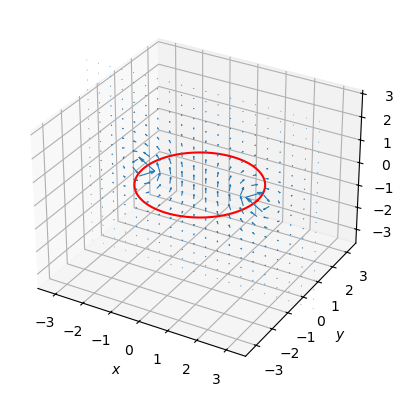

In [54]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, c='r')
ax.quiver(xx.ravel(), yy, zz.ravel(), bx, by, bz, 
           pivot='middle', length=0.3*(np.pi/constants.mu_0), linewidths=0.8)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_zlim(-3.5, 3)

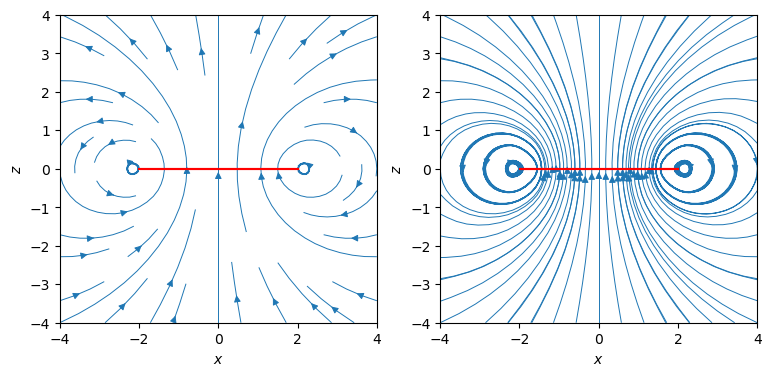

In [56]:
bx = np.array(bx).reshape(xx.shape)
bz = np.array(bz).reshape(xx.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.streamplot(xx, zz, bx, bz, linewidth=0.7, density=0.5, broken_streamlines=True, color='tab:blue')
ax2.streamplot(xx, zz, bx, bz, linewidth=0.7, density=0.5, broken_streamlines=False, color='tab:blue')
ax1.plot(x, z, c='r')
ax2.plot(x, z, c='r')

for ax in [ax1, ax2]:
    ax.set_xlabel('$x$')
    ax.set_ylabel('$z$')
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)